In [1]:
# Import libraries

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# data preprocessing / feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# combining
from sklearn.pipeline import make_pipeline

# <font color='red'>Part 1</font>

* **Load Data**

* **Separate the data into training and testing datasets**


In [2]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('winequality-white.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')



print('Sample rows from the dataset (top and bottom five):\n')  # Spot checks
display(dataset.head(5))
print('\n')
display(dataset.tail(5))




X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid' , 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ] 
y_name = 'quality'
X = dataset[X_name]   
y = dataset[y_name] 


# setting the seed allows for repeatability
seed = 42 

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('done \n')



Loading data from file ...
done 

Removing rows with missing data ...
done 

Sample rows from the dataset (top and bottom five):



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



* **Summarize Dataset Statistics**

In [3]:
print('Summary of the dataset - Univariate statistics\n')   

display(dataset.describe(include='all'))

Summary of the dataset - Univariate statistics



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Histograms:


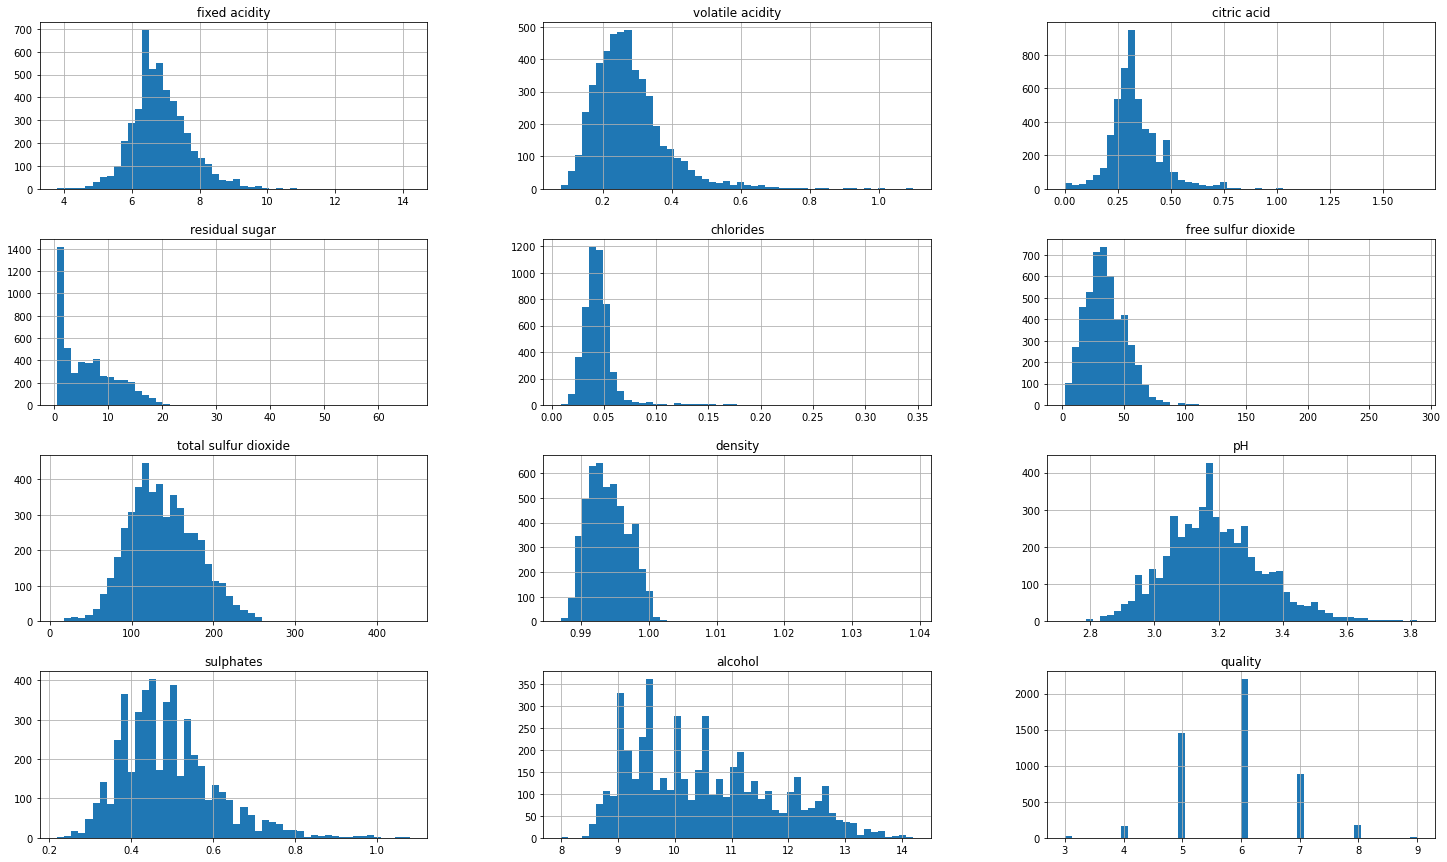



Box plots:


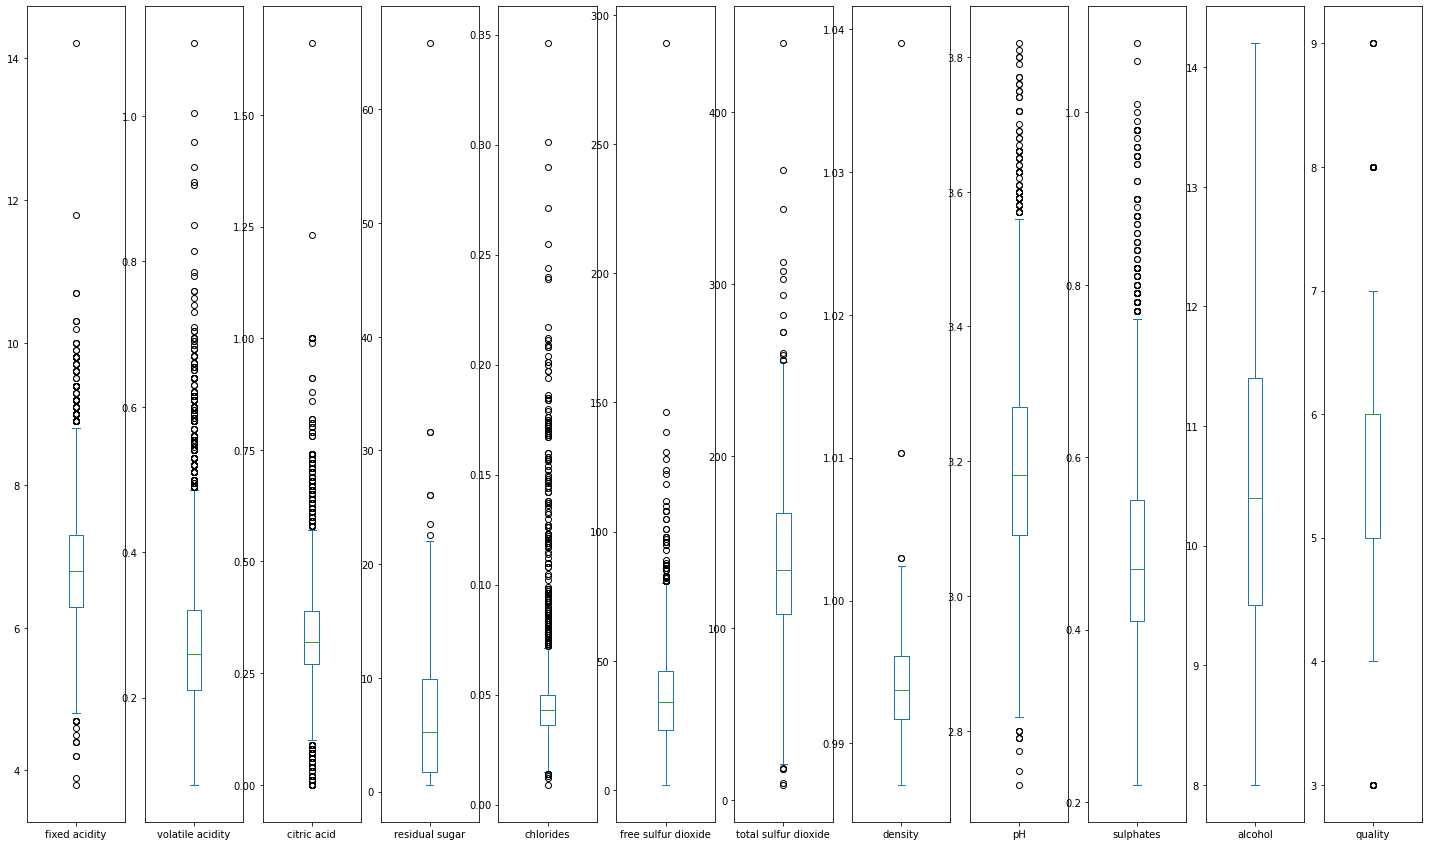



Correlation matrix:


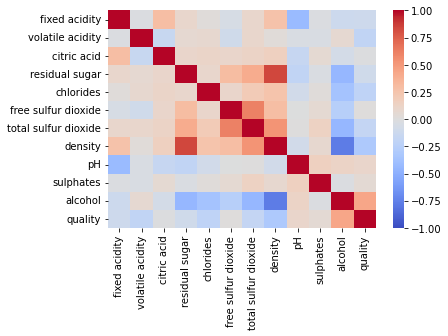



Scatter plots:


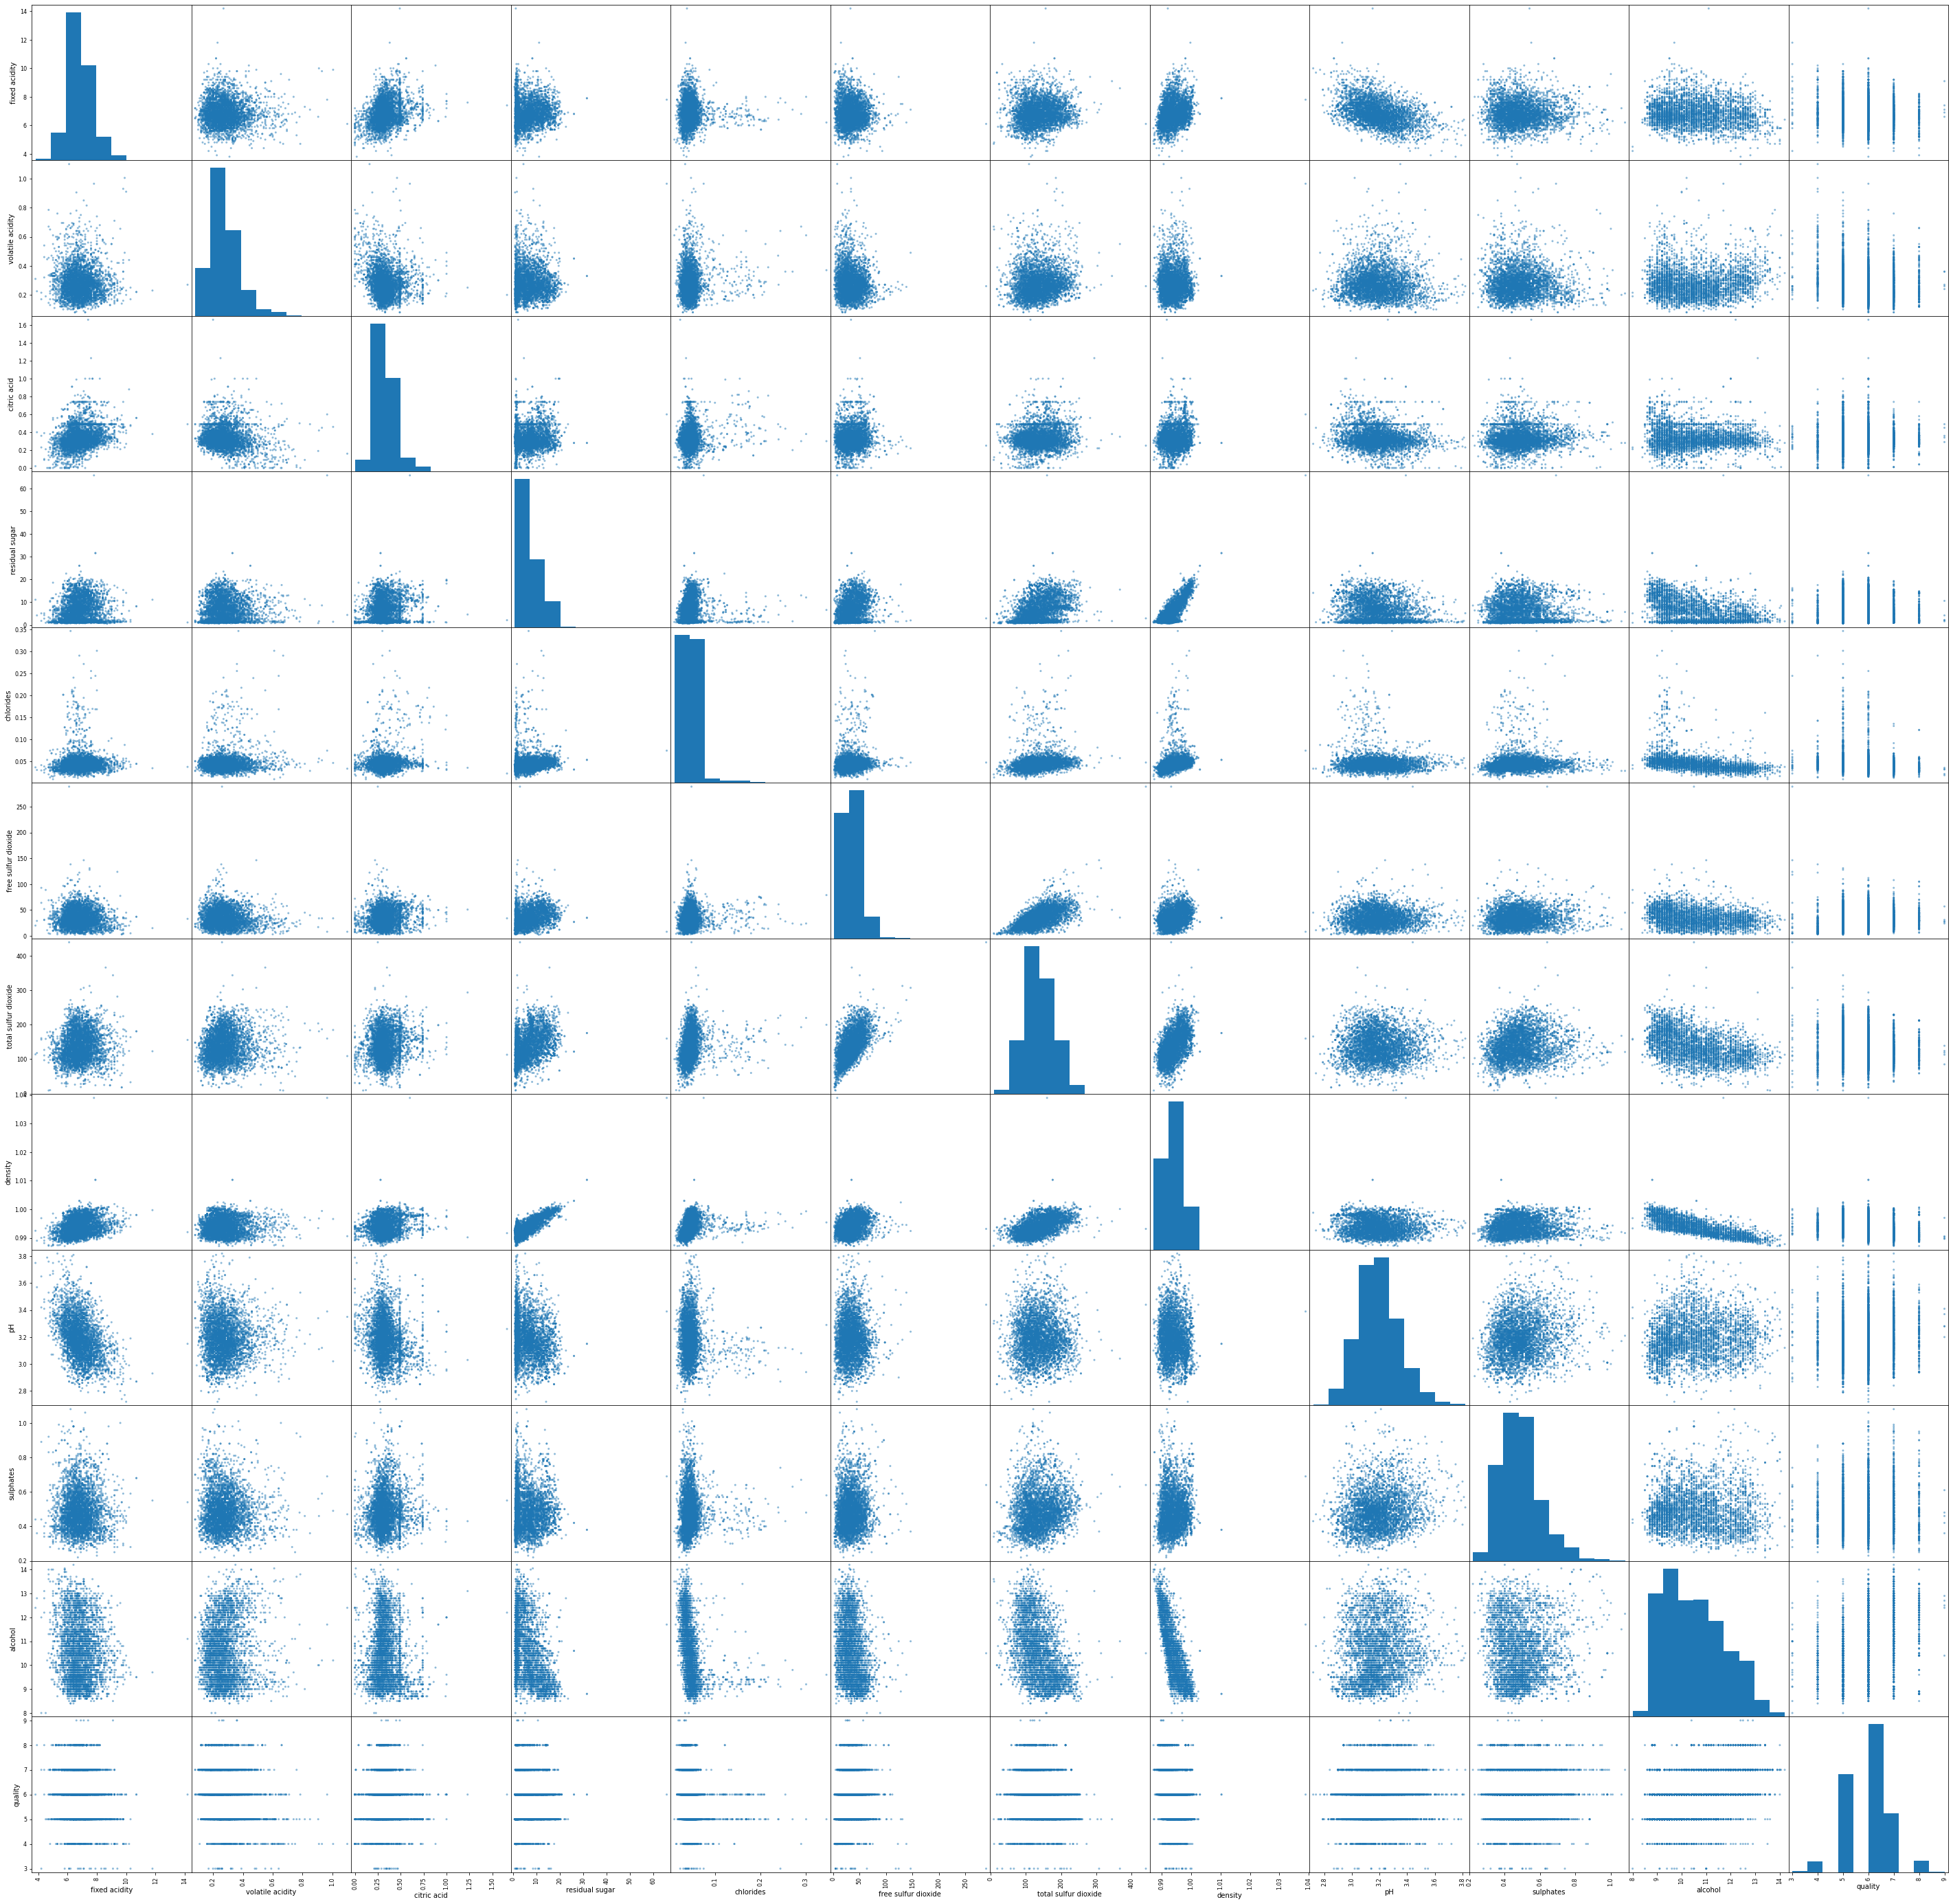

In [4]:
print('Histograms:')
dataset.hist(figsize=(25, 15), bins=50)  # bins ~= sqrt(N)
pl.show()

print("\n")

print('Box plots:')
dataset.plot(figsize=(25, 15), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

print("\n")

print('Correlation matrix:')
corr = dataset.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

print("\n")

print('Scatter plots:')
scatter_matrix(dataset, figsize=(50, 50))
pl.show()

print("\n")

* **Set up a classification problem**

In [5]:
# Spot checks for X:

print('Sample rows from X (top and bottom):')
display(X.head(3))
print('\n')


print('Summary of y:')
display(y.value_counts())

Sample rows from X (top and bottom):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1




Summary of y:


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#  <font color='red'>Part 2</font>

* **Decision Tree Classifier Model**
* **Random Forest Classifier Model**

In [12]:
scoring = 'f1_macro'
# Decision Tree
print('Tuning model...')



selected_model = DecisionTreeClassifier(random_state=0)
hyperparameters = {'max_depth': [None, 5,6,7], 'criterion':['gini', 'entropy'], 'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8], 'splitter': ['best', 'random'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Decision Tree:
{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'splitter': 'best'}
Decision tree has maximum depth 28.
f1_score is
0.3696934658267074


In [7]:
# Random Forest
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth':[None, 3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Random Forest:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Random Forest:
{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
f1_score is
0.48466224250389045


#  <font color='red'>Part 3</font>

* **SVM model**



In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# SVM
print('Tuning model...')
selected_model = svm.SVC()
hyperparameters = {'C':[0.1,1,1000],'kernel':['sigmoid','linear']}
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for SVM:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )



Tuning model...
Best hyperparameters found on development set for SVM:
{'C': 1000, 'kernel': 'linear'}
f1_score is
0.21461357407748086


#  <font color='red'>Part 4</font>

* **Scaled SVM**

In [45]:
scoring = 'f1_macro'

models = []
models.append(( 'raw_SVM', SVC(random_state=seed) ))
models.append(( 'scaled_SVM', make_pipeline( MinMaxScaler(), SVC(random_state=seed) )  ))

print('done \n')


# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, verbose=3)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

done 

 ++ NOW WORKING ON ALGORITHM raw_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.087) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.133) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=0.105) total time=   0.7s
[CV] END ................................ score: (test=0.126) total time=   0.7s
[CV] END ................................ score: (test=0.110) total time=   0.7s
algorithm raw_SVM f1_macro results: mean = 0.112070 (std = 0.016294)
 ++ NOW WORKING ON ALGORITHM scaled_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.225) total time=   0.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.238) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.222) total time=   0.6s
[CV] END ................................ score: (test=0.224) total time=   0.7s
[CV] END ................................ score: (test=0.240) total time=   0.7s
algorithm scaled_SVM f1_macro results: mean = 0.229620 (std = 0.007582)
done 



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished


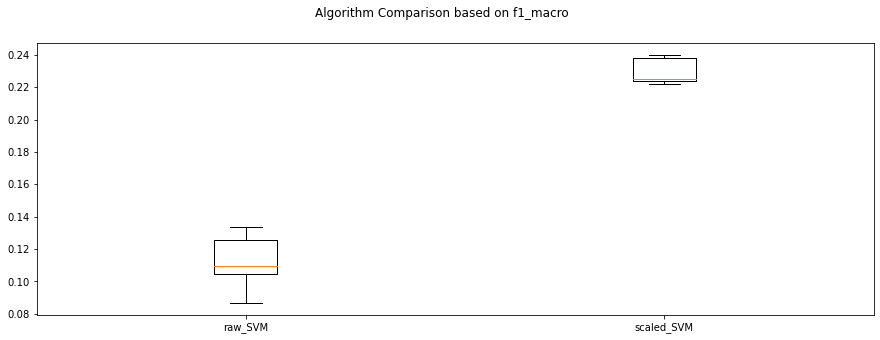

In [46]:
# Compare Algorithms
fig = pl.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

* **The dataset description states there are a lot of wines with a quality of 6 as compared to the others. So, the scaling of the dataset improves its performance.**

#  <font color='red'>Part 5</font>

* **Make predictions on test dataset**

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


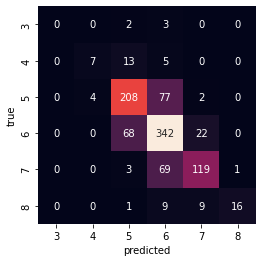


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.64      0.28      0.39        25
           5       0.71      0.71      0.71       291
           6       0.68      0.79      0.73       432
           7       0.78      0.62      0.69       192
           8       0.94      0.46      0.62        35

    accuracy                           0.71       980
   macro avg       0.62      0.48      0.52       980
weighted avg       0.71      0.71      0.70       980

Cohen Kappa Score: 0.5493828441695497


done 



C:\Users\mchavoo2\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mchavoo2\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mchavoo2\Anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
seed = 42, 

# Make predictions on test dataset

selected_model = make_pipeline( MinMaxScaler(),RandomForestClassifier(criterion= 'entropy', max_depth=None, n_estimators=50) ) 
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')




* **There is various way I can improve the score of the model. Like tuning the hyperparameters for that model like Hyperparametersfor the SVM. The GridSearchCV shows the best hyperparameters for the modeL.So, It is better to tune the parameter of the model first, then move for training. So, I can increase the efficiency and the accuracy of the model. The dataset description states there are a lot of wines with a quality of 6 as compared to the others. So, the scaling of the dataset improves its performance.**
